# Result Figure 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind

In [2]:
# excel_file_path = "./Result Table-apr.csv"
# diatrend_df = pd.read_csv(excel_file_path)
excel_file_path = "./Result Table (1).xlsx"
diatrend_df = pd.read_excel(excel_file_path, sheet_name="cross_dataset")
diatrend_df.head()

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,Rabby_retrained,Li_retrained,Rabby_crosscheck,Li_crosscheck,baseline
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,22.721628,21.346598,22.721628,21.830528,26.662815
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,17.686695,17.790308,17.686695,18.157267,23.247402
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,17.218540,16.038720,17.218540,16.875702,23.262571
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,20.015371,18.493727,20.015371,18.869516,28.477447
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,18.488050,18.988787,18.488050,19.197340,20.256378


In [3]:
# Retrained_result
retrained_result = diatrend_df[["Dataset", "SubjectID", "Martinsson_retrained", "vanDoorn_retrained", "Deng_retrained", "Lee_retrained", "Rabby_retrained", "Li_retrained"]].copy()

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_20558/1841509409.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_20558/1841509409.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_20558/1841509409.py:52: U

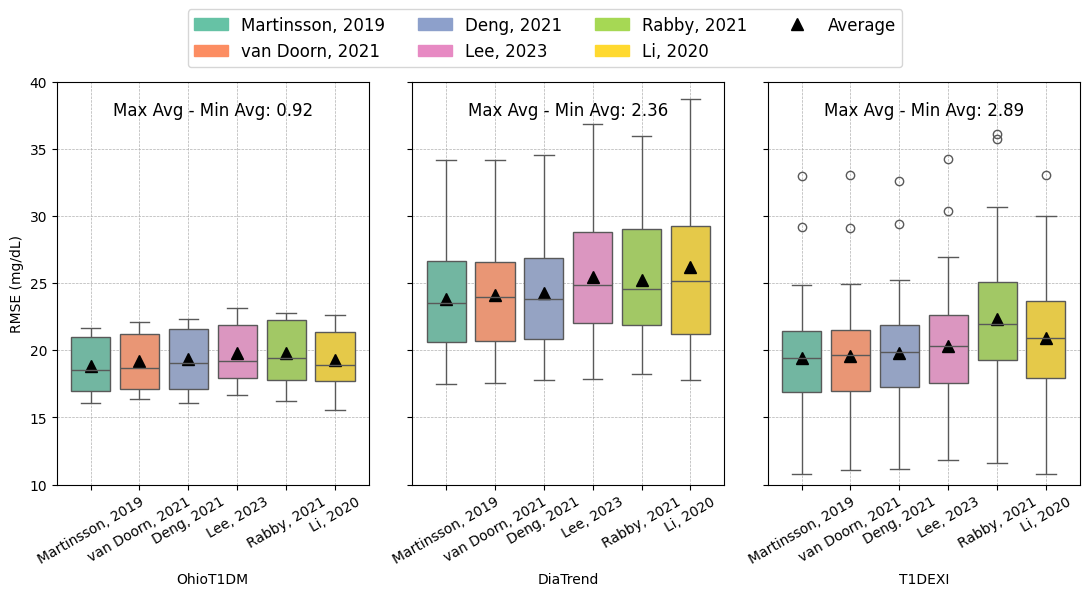

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Mapping of old method names to new method names
method_name_mapping = {
    'Martinsson': 'Martinsson, 2019',
    'vanDoorn': 'van Doorn, 2021',
    'Deng': 'Deng, 2021',
    'Lee': 'Lee, 2023',
    'Rabby': 'Rabby, 2021',
    'Li': 'Li, 2020'
}

# Paper-reported average RMSE for each method
paper_reported_rmse = {
    'Martinsson': 18.87,
    'vanDoorn': 18.828,
    'Deng': 19.08,
    'Rabby': 19.28,
    'Li': 18.57
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = retrained_result.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# Apply the method name mapping
melted_df['Group'] = melted_df['Group'].map(method_name_mapping)

# Calculate the average of the baseline by dataset
baseline_means = retrained_result.groupby('Dataset')['baseline'].mean()

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(11, 6), sharey=True)

# Define the datasets
datasets = ['OhioT1DM', 'DiaTrend', 'T1DEXI']

# Plot each dataset in a separate subplot
for i, dataset in enumerate(datasets):
    sns.boxplot(x='Group', y='Value', hue='Group', data=melted_df[melted_df['Dataset'] == dataset], ax=axes[i], palette='Set2', dodge=False)
    axes[i].set_xlabel(dataset)
    axes[i].set_ylabel('RMSE (mg/dL)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
    
    # Add a dashed line for the average baseline by dataset
    baseline_mean = baseline_means[dataset]
    # axes[i].axhline(y=baseline_mean, color='r', linestyle='--', linewidth=1.5, label=f'Baseline Mean: {baseline_mean:.2f}')
    axes[i].legend().remove()  # Remove individual legends
    
    # Annotate the average of each box with a triangle
    group_means = melted_df[melted_df['Dataset'] == dataset].groupby('Group')['Value'].mean()
    ordered_group_means = group_means.reindex(method_name_mapping.values())
    for j, group in enumerate(ordered_group_means.index):
        axes[i].plot(j, ordered_group_means[group], marker='^', color='black', markersize=8)
    
    # Calculate and annotate the difference between max average and min average
    max_avg = ordered_group_means.max()
    min_avg = ordered_group_means.min()
    diff_avg = max_avg - min_avg
    axes[i].text(0.5, 0.95, f'Max Avg - Min Avg: {diff_avg:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center')
    
    # Add light grid
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the y-axis range to be the same for all subplots
axes[0].set_ylim(10, 40)

# Create custom legend
# Mapping of old method names to new method names
method_name_mapping = {
    'Martinsson': 'Martinsson, 2019',
    'vanDoorn': 'van Doorn, 2021',
    'Deng': 'Deng, 2021',
    'Lee': 'Lee, 2023',
    'Rabby': 'Rabby, 2021',
    'Li': 'Li, 2020'
}
handles = [
    Patch(color=sns.color_palette('Set2')[0], label='Martinsson, 2019'),
    Patch(color=sns.color_palette('Set2')[1], label='van Doorn, 2021'),
    Patch(color=sns.color_palette('Set2')[2], label='Deng, 2021'),
    Patch(color=sns.color_palette('Set2')[3], label='Lee, 2023'),
    Patch(color=sns.color_palette('Set2')[4], label='Rabby, 2021'),
    Patch(color=sns.color_palette('Set2')[5], label='Li, 2020'),
    # Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Baseline Mean'),
    Line2D([0], [0], marker='^', color='black', markersize=8, label='Average', linestyle='None')
]

fig.legend(handles=handles, loc='upper center', ncol=4, fontsize=12, bbox_to_anchor=(0.5, 1.0))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
# plt.suptitle('Retrained RMSE by Dataset and Method', fontsize=16, y=1.05)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\baiyi\AppData\Local\Temp\ipykernel_24184\1367300582.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
C:\Users\baiyi\AppData\Local\Temp\ipykernel_24184\1367300582.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
C:\Users\baiyi\AppData\Local\Temp\i

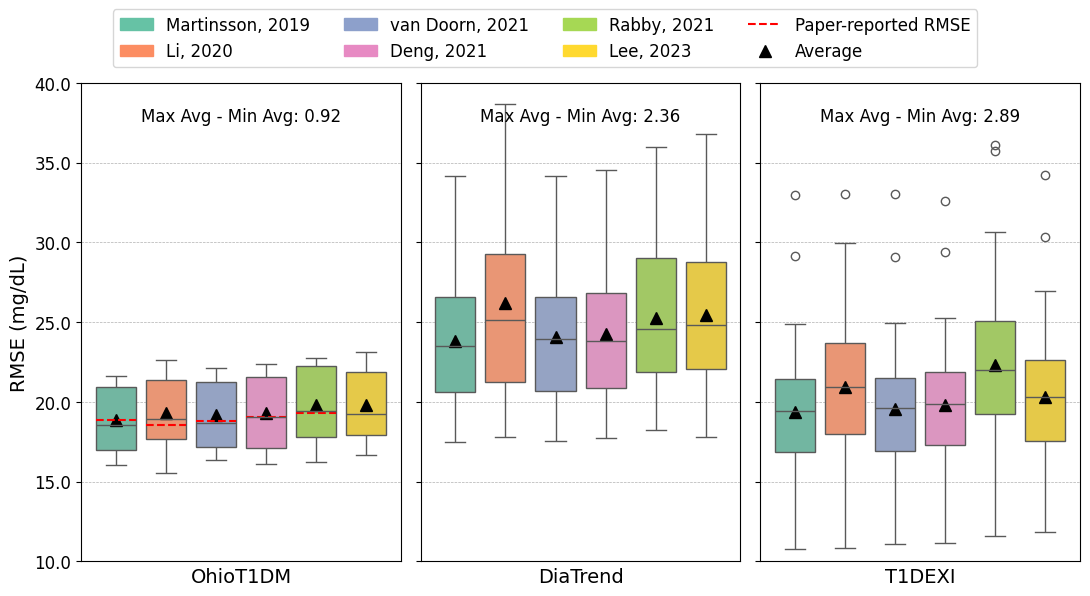

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Mapping of old method names to new method names
method_name_mapping = {
    'Martinsson': 'Martinsson, 2019',
    'Li': 'Li, 2020',
    'vanDoorn': 'van Doorn, 2021',
    'Deng': 'Deng, 2021',
    'Rabby': 'Rabby, 2021',
    'Lee': 'Lee, 2023',
}

# Paper-reported average RMSE for each method
paper_reported_rmse = {
    'Martinsson': 18.87,
    'Li': 18.57,
    'vanDoorn': 18.828,
    'Deng': 19.08,
    'Rabby': 19.28,
    'Lee': -1,
    
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = retrained_result.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'Li_retrained','vanDoorn_retrained', 'Deng_retrained', 
                                               'Rabby_retrained', 'Lee_retrained'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# Apply the method name mapping
melted_df['Group'] = melted_df['Group'].map(method_name_mapping)

# Calculate the average of the baseline by dataset
# baseline_means = retrained_result.groupby('Dataset')['baseline'].mean()

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(11, 6), sharey=True)

# Define the datasets
datasets = ['OhioT1DM', 'DiaTrend', 'T1DEXI']

# Plot each dataset in a separate subplot
for i, dataset in enumerate(datasets):
    sns.boxplot(x='Group', y='Value', hue='Group', data=melted_df[melted_df['Dataset'] == dataset], ax=axes[i], palette='Set2', dodge=False)
    axes[i].set_xlabel(dataset, fontsize=14)
    axes[i].set_ylabel('RMSE (mg/dL)', fontsize=14)
    # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
    axes[i].set_xticks([])
    
    
    # Add a dashed line for the average baseline by dataset
    # baseline_mean = baseline_means[dataset]
    # axes[i].axhline(y=baseline_mean, color='r', linestyle='--', linewidth=1.5, label=f'Baseline Mean: {baseline_mean:.2f}')
    axes[i].legend().remove()  # Remove individual legends
    
    # Annotate the average of each box with a triangle
    group_means = melted_df[melted_df['Dataset'] == dataset].groupby('Group')['Value'].mean()
    ordered_group_means = group_means.reindex(method_name_mapping.values())
    for j, group in enumerate(ordered_group_means.index):
        axes[i].plot(j, ordered_group_means[group], marker='^', color='black', markersize=8)
    
    # Calculate and annotate the difference between max average and min average
    max_avg = ordered_group_means.max()
    min_avg = ordered_group_means.min()
    diff_avg = max_avg - min_avg
    axes[i].text(0.5, 0.95, f'Max Avg - Min Avg: {diff_avg:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center')
    
    # Add light grid
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Add paper-reported RMSE as red dashed segments to the first subfigure
for j, (method, rmse) in enumerate(paper_reported_rmse.items()):
    axes[0].plot([j - 0.4, j + 0.4], [rmse, rmse], 'r--', linewidth=1.5)

# Set the y-axis range to be the same for all subplots
axes[0].set_ylim(10, 40)
for ax in axes:
    ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Create custom legend
handles = [
    Patch(color=sns.color_palette('Set2')[0], label='Martinsson, 2019'),
    Patch(color=sns.color_palette('Set2')[1], label='Li, 2020'),
    Patch(color=sns.color_palette('Set2')[2], label='van Doorn, 2021'),
    Patch(color=sns.color_palette('Set2')[3], label='Deng, 2021'),
    Patch(color=sns.color_palette('Set2')[4], label='Rabby, 2021'),
    Patch(color=sns.color_palette('Set2')[5], label='Lee, 2023'),
    Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Paper-reported RMSE'),
    Line2D([0], [0], marker='^', color='black', markersize=8, label='Average', linestyle='None')
]

fig.legend(handles=handles, loc='upper center', ncol=4, fontsize=12, bbox_to_anchor=(0.5, 1.0))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
# plt.suptitle('Retrained RMSE by Dataset and Method', fontsize=16, y=1.05)
plt.show()

In [7]:
# Create and Save Individual Subplots

# Define the datasets
datasets = ['OhioT1DM', 'DiaTrend', 'T1DEXI']
dic = {
    "OhioT1DM": [19.4, 15.6, 23.1],
    "DiaTrend": [24.9, 17.5, 46.8],
    "T1DEXI": [20.4, 10.8, 36.1]
}

# Loop through each dataset and create individual subplots
for dataset in datasets:
    # Create a figure for the current dataset
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # Plot the boxplot for the current dataset
    sns.boxplot(
        x='Group', y='Value', hue='Group',
        data=melted_df[melted_df['Dataset'] == dataset],
        ax=ax, palette='Set2', dodge=False
    )
    
    # Set labels and title
    ax.set_xlabel(dataset, fontsize=14)
    ax.set_ylabel('30-min BG Pred. RMSE (mg/dL)', fontsize=14)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(10, 40)
    # Annotate the average of each box with a triangle
    group_means = melted_df[melted_df['Dataset'] == dataset].groupby('Group')['Value'].mean()
    ordered_group_means = group_means.reindex(method_name_mapping.values())
    for j, group in enumerate(ordered_group_means.index):
        ax.plot(j, ordered_group_means[group], marker='^', color='black', markersize=8)
    # ax.text(0, 3, f'RMSE Avg: {dic[dataset][0]}\RMSE Range: {dic[dataset][1]}~{dic[dataset][2]}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center')
    ax.text(
    0.5, 1.02,
    f'RMSE Avg: {dic[dataset][0]:.1f} mg/dL\nRMSE Range: {dic[dataset][1]:.1f} – {dic[dataset][2]:.1f} mg/dL',
    transform=ax.transAxes,
    fontsize=14,
    ha='center',
    va='bottom')
    if dataset == "OhioT1DM":
        for j, (method, rmse) in enumerate(paper_reported_rmse.items()):
            ax.plot([j - 0.4, j + 0.4], [rmse, rmse], 'r--', linewidth=1.5)
    
    # Add light grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Save the subplot without the legend
    fig.tight_layout()
    fig.savefig(f'{dataset}_subplot.png', dpi=300)
    plt.close(fig)



In [8]:
# Create and save the vertical legend separately
fig, ax = plt.subplots(figsize=(2.5, 6))
handles = [
    Patch(color=sns.color_palette('Set2')[0], label='Martinsson, 2019'),
    Patch(color=sns.color_palette('Set2')[1], label='Li, 2020'),
    Patch(color=sns.color_palette('Set2')[2], label='van Doorn, 2021'),
    Patch(color=sns.color_palette('Set2')[3], label='Deng, 2021'),
    Patch(color=sns.color_palette('Set2')[4], label='Rabby, 2021'),
    Patch(color=sns.color_palette('Set2')[5], label='Lee, 2023'),
    Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Paper-reported RMSE'),
    Line2D([0], [0], marker='^', color='black', markersize=8, label='Average', linestyle='None')
]
ax.legend(handles=handles, loc='center', fontsize=12, frameon=False)
ax.axis('off')  # Turn off the axis
fig.tight_layout()
fig.savefig('vertical_legend.png', dpi=300)
plt.close(fig)

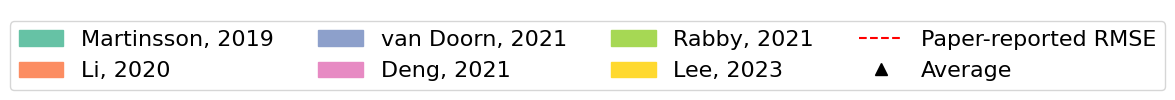

In [9]:
# Create custom legend
fig, ax = plt.subplots(figsize=(8, 1))
handles = [
    Patch(color=sns.color_palette('Set2')[0], label='Martinsson, 2019'),
    Patch(color=sns.color_palette('Set2')[1], label='Li, 2020'),
    Patch(color=sns.color_palette('Set2')[2], label='van Doorn, 2021'),
    Patch(color=sns.color_palette('Set2')[3], label='Deng, 2021'),
    Patch(color=sns.color_palette('Set2')[4], label='Rabby, 2021'),
    Patch(color=sns.color_palette('Set2')[5], label='Lee, 2023'),
    Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Paper-reported RMSE'),
    Line2D([0], [0], marker='^', color='black', markersize=8, label='Average', linestyle='None')
]

ax.legend(handles=handles, loc='upper center', ncol=4, fontsize=16)
ax.axis('off')  # Turn off the axis
fig.tight_layout()
# Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.9])
# plt.suptitle('Retrained RMSE by Dataset and Method', fontsize=16, y=1.05)
# fig.savefig('horizontal_legend.png', dpi=300)
plt.show()

In [8]:
# Filter the dataframe for the DiaTrend dataset
diatrend_df = retrained_result[retrained_result['Dataset'] == 'DiaTrend']

# Melt the dataframe to long format
melted_df = diatrend_df.melt(id_vars='Dataset', 
                             value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                         'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline'],
                             var_name='Group', 
                             value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# List of all methods
methods = melted_df['Group'].unique()

# Initialize DataFrames to store the p-values and significance
p_values = pd.DataFrame(index=methods, columns=methods)
significance = pd.DataFrame(index=methods, columns=methods)

# Perform pairwise t-tests and store the p-values and significance
alpha = 0.05
for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            values1 = melted_df[melted_df['Group'] == method1]['Value']
            values2 = melted_df[melted_df['Group'] == method2]['Value']
            _, p_value = ttest_ind(values1, values2)
            p_values.loc[method1, method2] = p_value
            significance.loc[method1, method2] = 'Yes' if p_value < alpha else 'No'
        else:
            p_values.loc[method1, method2] = np.nan  # Fill diagonal with NaN
            significance.loc[method1, method2] = 'N/A'

# Print the p-values table
print("P-values:")
print(p_values)

# Print the significance table
print("\nSignificance (Yes/No):")
print(significance)

P-values:
           Martinsson  vanDoorn      Deng       Lee     Rabby        Li  \
Martinsson        NaN  0.762175  0.611898  0.054154  0.096594  0.018578   
vanDoorn     0.762175       NaN  0.836594  0.097431  0.163895  0.032816   
Deng         0.611898  0.836594       NaN  0.142167   0.22912  0.047858   
Lee          0.054154  0.097431  0.142167       NaN  0.806062  0.463081   
Rabby        0.096594  0.163895   0.22912  0.806062       NaN  0.347475   
Li           0.018578  0.032816  0.047858  0.463081  0.347475       NaN   
baseline          0.0  0.000001  0.000003  0.000934  0.000448  0.026199   

            baseline  
Martinsson       0.0  
vanDoorn    0.000001  
Deng        0.000003  
Lee         0.000934  
Rabby       0.000448  
Li          0.026199  
baseline         NaN  

Significance (Yes/No):
           Martinsson vanDoorn Deng  Lee Rabby   Li baseline
Martinsson        N/A       No   No   No    No  Yes      Yes
vanDoorn           No      N/A   No   No    No  Yes      Ye

In [11]:
# Filter the dataframe for the T1DEXI dataset
t1dexi_df = retrained_result[retrained_result['Dataset'] == 'T1DEXI']

# Melt the dataframe to long format
melted_df_t1dexi = t1dexi_df.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df_t1dexi['Group'] = melted_df_t1dexi['Group'].str.replace('_retrained', '')

# List of all methods
methods_t1dexi = melted_df_t1dexi['Group'].unique()

# Initialize DataFrames to store the p-values and significance
p_values_t1dexi = pd.DataFrame(index=methods_t1dexi, columns=methods_t1dexi)
significance_t1dexi = pd.DataFrame(index=methods_t1dexi, columns=methods_t1dexi)

# Perform pairwise t-tests and store the p-values and significance
alpha = 0.05
for method1 in methods_t1dexi:
    for method2 in methods_t1dexi:
        if method1 != method2:
            values1 = melted_df_t1dexi[melted_df_t1dexi['Group'] == method1]['Value']
            values2 = melted_df_t1dexi[melted_df_t1dexi['Group'] == method2]['Value']
            _, p_value = ttest_ind(values1, values2)
            p_values_t1dexi.loc[method1, method2] = p_value
            significance_t1dexi.loc[method1, method2] = 'Yes' if p_value < alpha else 'No'
        else:
            p_values_t1dexi.loc[method1, method2] = np.nan  # Fill diagonal with NaN
            significance_t1dexi.loc[method1, method2] = 'N/A'

# Print the p-values table
print("P-values for T1DEXI:")
print(p_values_t1dexi)

# Print the significance table
print("\nSignificance (Yes/No) for T1DEXI:")
print(significance_t1dexi)

P-values for T1DEXI:
           Martinsson  vanDoorn      Deng       Lee     Rabby        Li  \
Martinsson        NaN  0.818272  0.551625  0.187987  0.000186  0.038349   
vanDoorn     0.818272       NaN  0.711214  0.268377  0.000349  0.060045   
Deng         0.551625  0.711214       NaN  0.454493  0.001104  0.123178   
Lee          0.187987  0.268377  0.454493       NaN  0.010855  0.416072   
Rabby        0.000186  0.000349  0.001104  0.010855       NaN  0.086719   
Li           0.038349  0.060045  0.123178  0.416072  0.086719       NaN   
baseline          0.0       0.0       0.0  0.000006  0.033207  0.000191   

            baseline  
Martinsson       0.0  
vanDoorn         0.0  
Deng             0.0  
Lee         0.000006  
Rabby       0.033207  
Li          0.000191  
baseline         NaN  

Significance (Yes/No) for T1DEXI:
           Martinsson vanDoorn Deng  Lee Rabby   Li baseline
Martinsson        N/A       No   No   No   Yes  Yes      Yes
vanDoorn           No      N/A   No  